In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read in data set
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
# small data set

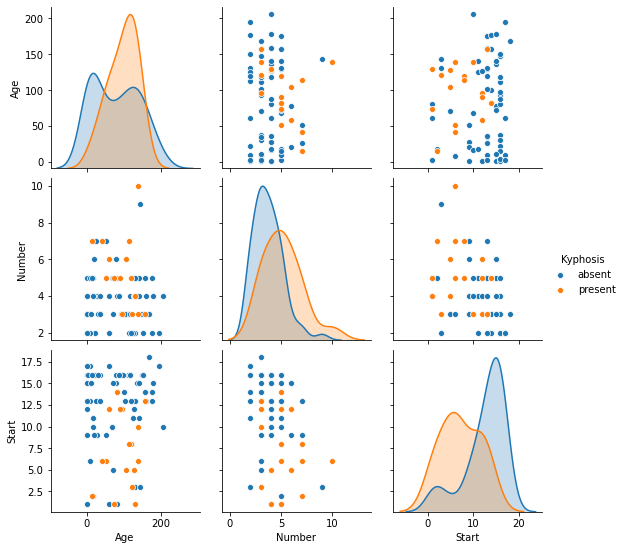

In [8]:
sns.pairplot(df,hue='Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Kyphosis',axis=1)

In [11]:
y = df['Kyphosis']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [13]:
# import tree
from sklearn.tree import DecisionTreeClassifier

In [51]:
# create decision tree object
dtree = DecisionTreeClassifier()

In [52]:
# fit the data to the dtree
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
predictions = dtree.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[16  0]
 [ 8  1]]


              precision    recall  f1-score   support

      absent       0.67      1.00      0.80        16
     present       1.00      0.11      0.20         9

    accuracy                           0.68        25
   macro avg       0.83      0.56      0.50        25
weighted avg       0.79      0.68      0.58        25



In [34]:
# import random forest
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=200)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[16  0]
 [ 9  0]]


              precision    recall  f1-score   support

      absent       0.64      1.00      0.78        16
     present       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



In [47]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64